<a href="https://colab.research.google.com/github/nimishakadam/Sentiment-analysis-of-movie-reviews/blob/main/Sentiment_Analysis_using_MNB_and_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from bs4 import BeautifulSoup
import pickle
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()

In [ ]:
data=pd.read_csv("/content/drive/My Drive/imdb-reviews/imdb-50k.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.shape

(50000, 2)

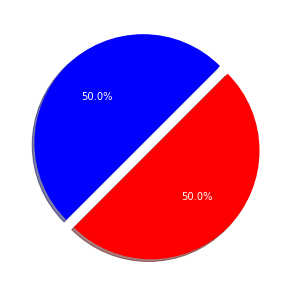

In [ ]:
fig=plt.figure(figsize=(5,5))
colors=["blue",'red']
pos=data[data['sentiment'] == 'positive']
neg=data[data['sentiment'] == 'negative']
ck=[pos['sentiment'].count(),neg['sentiment'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1), textprops={'color':"w"})

In [ ]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword = set(stopwords.words("english"))
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

data['review']=data['review'].apply(denoise_text)

In [ ]:
def clean(text):
    wn = nltk.WordNetLemmatizer()
    stopword = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    lower = [word.lower() for word in tokens]
    no_stopwords = [word for word in lower if word not in stopword]
    no_alpha = [word for word in no_stopwords if word.isalpha()]
    lemm_text = [wn.lemmatize(word) for word in no_alpha]
    clean_text = lemm_text
    return clean_text


In [ ]:
from wordcloud import WordCloud

data['clean']=data['review'].map(clean)
data['clean_text']=data['clean'].apply(lambda x: " ".join([str(word) for word in x]))

positive_words=" ".join(data[data.sentiment=='positive']['clean_text'].values)
negative_words=" ".join(data[data.sentiment=='negative']['clean_text'].values)

Wordcloud for Positive words


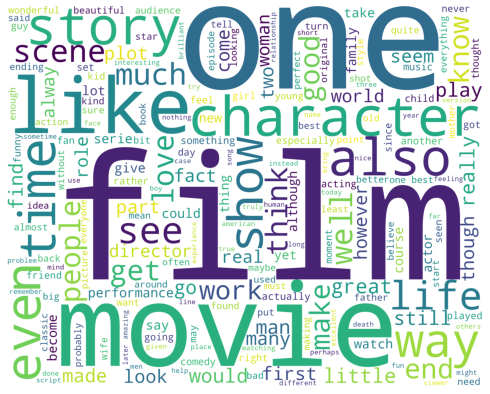


Wordcloud for Negative words


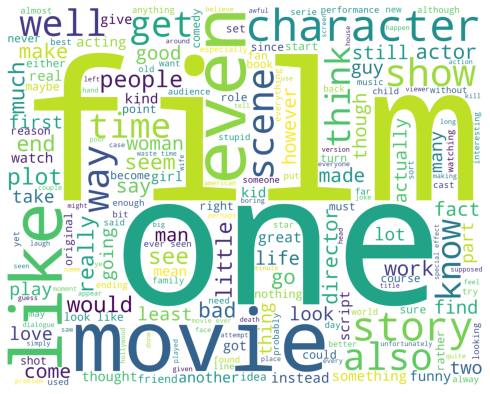

In [ ]:
def wordcloud_draw(data, sentiment):
    wordcloud = WordCloud(stopwords=stopword,
                      background_color= 'white',
                      width=2500,
                      height=2000
                     ).generate(data)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Wordcloud for Positive words")
wordcloud_draw(positive_words,"positive")
print("\nWordcloud for Negative words")
wordcloud_draw(negative_words,"negative")

In [ ]:
def tokenizer_porter(text):
    return [word for word in text.split()]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)

In [ ]:
y=data.sentiment.values
x=tfidf.fit_transform(data.clean_text)
print(x)

  (0, 71072)	0.04861090654925215
  (0, 18581)	0.07791455674473555
  (0, 79973)	0.05648784460644754
  (0, 84622)	0.05411568478188727
  (0, 81963)	0.07491864912243702
  (0, 15134)	0.07666772884804718
  (0, 6628)	0.04730697112159682
  (0, 48867)	0.03883591226183824
  (0, 26383)	0.049276876741144726
  (0, 71674)	0.06213898884823387
  (0, 75128)	0.05470022904904462
  (0, 43869)	0.04784433995085409
  (0, 7893)	0.08362582815821383
  (0, 81230)	0.05250201296462892
  (0, 14192)	0.054994812963816656
  (0, 50280)	0.05432118299791006
  (0, 47959)	0.09291168744446232
  (0, 86087)	0.027418491547786347
  (0, 5098)	0.04027320340828974
  (0, 31355)	0.05069543096373578
  (0, 55994)	0.051265324153693635
  (0, 42674)	0.047069658762509445
  (0, 39064)	0.17239168754712883
  (0, 53943)	0.1115274204032902
  (0, 72759)	0.07359958603587588
  :	:
  (49999, 27004)	0.1746745528532642
  (49999, 87516)	0.09227795525049456
  (49999, 10938)	0.08360720438417796
  (49999, 74261)	0.0883209930510307
  (49999, 53498)	0.092

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2,shuffle=False)

In [ ]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  

svclassifier.fit(X_train, y_train)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import accuracy_score
val_pred = svclassifier.predict(X_test)
#print(val_pred)
print("Accuracy for SVM classifier is: ",accuracy_score(y_test, val_pred))

Accuracy for SVM classifier is:  0.8951


In [ ]:
pickle.dump(tfidf.vocabulary_, open("feature.pkl", "wb"))
filename = 'svm_model.sav'
pickle.dump(svclassifier, open(filename, 'wb'))
loaded_model_svm = pickle.load(open(filename, 'rb'))

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
from sklearn.metrics import accuracy_score
val_pred = nb.predict(X_test)
#print(val_pred)
print("Accuracy for Multinomial Naive Bayes classifier is: ",accuracy_score(y_test, val_pred))

Accuracy for Multinomial Naive Bayes classifier is:  0.8656


In [ ]:
filename = 'nb_model.sav'
pickle.dump(nb, open(filename, 'wb'))
loaded_model_nb = pickle.load(open(filename, 'rb'))

In [ ]:
text = 'i had a great time at the theatre'
print("Review :",text)

text = clean(text)
clean_text = ' '.join([str(word) for word in text])
clean_text = np.array([clean_text])

from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfv_loaded = TfidfVectorizer(sublinear_tf=True, stop_words = "english", vocabulary=pickle.load(open("feature.pkl", "rb")))
clean_text = transformer.fit_transform(tfv_loaded.fit_transform(clean_text))
polarity_svm = loaded_model_svm.predict(clean_text)
polarity_nb = loaded_model_nb.predict(clean_text)

print("\nClassifying using SVM:")
if polarity_svm == 'positive':
  print("\nPositive sentiment")
else:
  print("\nNegative sentiment")  

print("\nClassifying using Naive Bayes:")
if polarity_nb == 'positive':
  print("\nPositive sentiment")
else:
  print("\nNegative sentiment")

Review : i had a great time at the theatre

Classifying using SVM:

Positive sentiment

Classifying using Naive Bayes:

Positive sentiment


In [ ]:
text = 'Okay movie for single watch.'
print("Review :",text)

text = clean(text)
clean_text = ' '.join([str(word) for word in text])
clean_text = np.array([clean_text])

from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfv_loaded = TfidfVectorizer(sublinear_tf=True, stop_words = "english", vocabulary=pickle.load(open("feature.pkl", "rb")))
clean_text = transformer.fit_transform(tfv_loaded.fit_transform(clean_text))
polarity_svm = loaded_model_svm.predict(clean_text)
polarity_nb = loaded_model_nb.predict(clean_text)

print("\nClassifying using SVM:")
if polarity_svm == 'positive':
  print("\nPositive sentiment")
else:
  print("\nNegative sentiment")

print("\nClassifying using Naive Bayes:")
if polarity_nb == 'positive':
  print("\nPositive sentiment")
else:
  print("\nNegative sentiment")

Review : Okay movie for single watch.

Classifying using SVM:

Negative sentiment

Classifying using Naive Bayes:

Negative sentiment
